In [57]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from google.colab import files
upload = files.upload()

Saving Dataset.zip to Dataset.zip


In [6]:
import zipfile
with zipfile.ZipFile('Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall("./")

In [58]:
import cv2
import os

def load_images_from_folder(folder, i):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = tf.image.resize(img, [28,28])
        if img is not None:
            images.append([img, i])
    return images


In [59]:
import numpy as np

In [89]:
def load_category(no_cat):
  train_img = []

  for i in range(1, no_cat+1):
    img = np.array(load_images_from_folder("./Dataset/train/category "+str(i), i-1))
    train_img.append(img)

  return train_img

In [90]:
train_data = load_category(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


In [91]:
train_data = np.array(train_data)
train_data.shape


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(4,)

In [92]:
import tensorflow as tf

In [93]:
x_train = []
y_train = []

for i in range(len(train_data)):
  for img in train_data[i]:
    x_train.append(np.array(img[0]))
    y_train.append(np.array(img[1]))

In [94]:
x_train = np.array(x_train)
y_train = np.array(y_train)


In [95]:
x_train


array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [96]:
##grayscalling

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

x_train_gray = []
for img in x_train:
  x_train_gray.append(rgb2gray(img))

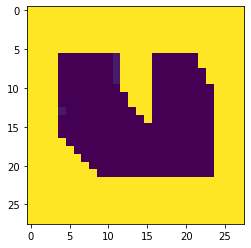

In [97]:
plt.imshow(x_train_gray[0])

In [98]:
x_train_gray = np.array(x_train_gray)

In [99]:
x_train_gray.shape

(440, 28, 28)

In [100]:
#LeNet-5 Arch

model = Sequential()

#Layer 1
#Conv Layer 1
model.add(Conv2D(filters=6, kernel_size=5, strides=1, activation='sigmoid', input_shape = (28,28,1)))
#pooling layer 1
model.add(MaxPooling2D(pool_size=2, strides=2))

#Layer 2
#Conv Layer 2
model.add(Conv2D(filters=16, kernel_size=5, strides=1, activation='sigmoid', input_shape = (14,14,6)))
#pooling layer 2
model.add(MaxPooling2D(pool_size=2, strides=2))

#Flatten
model.add(Flatten())

#Layer 3
#Fully connected layer 1
model.add(Dense(units=120, activation='sigmoid'))

#Layer 4 
#Fully connected layer 2
model.add(Dense(units=84, activation='sigmoid'))

#Layer 5 
#Output Layer
model.add(Dense(units=4, activation='softmax'))

model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])


In [102]:

model.fit(x_train_gray, y_train, epochs=200, batch_size=10, validation_split=0.2)

Epoch 1/200
36/36 [==============================] - 1s 14ms/step - loss: 0.6972 - accuracy: 0.6875 - val_loss: 1.7504 - val_accuracy: 0.0000e+00
Epoch 2/200
36/36 [==============================] - 0s 12ms/step - loss: 0.6595 - accuracy: 0.7585 - val_loss: 1.6633 - val_accuracy: 0.0000e+00
Epoch 3/200
36/36 [==============================] - 0s 13ms/step - loss: 0.6187 - accuracy: 0.7472 - val_loss: 1.5284 - val_accuracy: 0.0000e+00
Epoch 4/200
36/36 [==============================] - 0s 13ms/step - loss: 0.5824 - accuracy: 0.7642 - val_loss: 1.6826 - val_accuracy: 0.0000e+00
Epoch 5/200
36/36 [==============================] - 1s 14ms/step - loss: 0.5424 - accuracy: 0.7926 - val_loss: 1.2454 - val_accuracy: 0.0000e+00
Epoch 6/200
36/36 [==============================] - 0s 12ms/step - loss: 0.4841 - accuracy: 0.8239 - val_loss: 1.5451 - val_accuracy: 0.0000e+00
Epoch 7/200
36/36 [==============================] - 0s 12ms/step - loss: 0.4639 - accuracy: 0.8125 - val_loss: 1.4787 - val